In [4]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)
diff = y - y_pred 
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grade_w1, grade_w2 = tf.gradients(loss, [w1,w2])

In [6]:
with tf.Session() as sess:
    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D)}
    out = sess.run([loss, grade_w1, grade_w2],feed_dict=values)
    loss_val, grade_w1_val, grade_w2_val = out
    print(out)


[47152496.0, array([[-9928.779   , -1817.1914  ,  -232.6308  , ...,   -18.989532,
        -1775.9824  , 10560.762   ],
       [  521.9669  , -2876.7168  , -4815.2466  , ..., -5127.304   ,
        -6546.84    , -3088.944   ],
       [ 2591.0994  ,  2819.408   ,  4265.152   , ..., -5141.0293  ,
        -2246.4832  ,   168.61395 ],
       ...,
       [ 1748.1624  ,  3226.3386  ,  2624.6318  , ...,  3213.4385  ,
         1942.9698  ,  1427.944   ],
       [ 3707.0251  ,  6550.209   ,  5483.63    , ...,  3927.7422  ,
         7462.5835  ,  4770.198   ],
       [-4748.813   , -3335.7068  , -5028.2207  , ..., -5687.1064  ,
        -6999.67    , -6692.534   ]], dtype=float32), array([[ 2.0357980e+03, -2.8380642e+03, -1.9833317e+03, ...,
        -4.1274005e+02, -3.0773773e+00, -4.4460229e+03],
       [ 6.0135309e+02, -1.1840062e+03, -1.5162018e+03, ...,
        -2.6119666e+03,  9.0549249e+02, -3.6325964e+03],
       [ 2.8058696e+03, -3.0919620e+02, -8.0978357e+02, ...,
        -3.1844548e+03,  

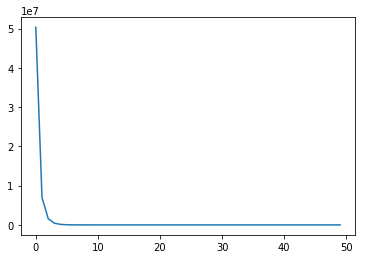

50337770.0 975.15814


In [7]:
learning_rate=1e-5
with tf.Session() as sess:
    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D)}
    loss_summery=[]
    steps=50
    for t in range(steps):
        out = sess.run([loss, grade_w1, grade_w2],feed_dict=values)
        loss_val, grade_w1_val, grade_w2_val = out
        values[w1] -= learning_rate * grade_w1_val
        values[w1] -= learning_rate * grade_w1_val
        loss_summery.append(loss_val)
    plt.plot(range(steps), loss_summery)
    plt.show()
    print(loss_summery[0],loss_summery[steps-1])